In [1]:
import keras
import pandas as pd
keras.__version__

'2.4.3'

## IMDB 데이터셋

인터넷 영화 데이터베이스로부터 가져온 리뷰 50,000개로 이루어진 IMDB 데이터셋을 사용
데이터셋은 훈련 데이터 25,000개와 테스트 데이터 25,000개로 나뉘어 있음
각각 50%는 부정, 50%는 긍정 리뷰로 구성되어 있음

IMDB 데이터셋은 케라스에 포함되어 있음
이 데이터는 전처리되어 있어 각 리뷰(단어 시퀀스)가 숫자 시퀀스로 변환되어 있음
여기서 각 숫자는 사전에 있는 고유한 단어를 나타냄

다음 코드는 데이터셋을 로드함(처음 실행하면 17MB 정도의 데이터가 컴퓨터에 다운로드됨)

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant

In [3]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

매개변수 `num_words=10000`은 훈련 데이터에서 가장 자주 나타나는 단어 10,000개만 사용하겠다는 의미
드물게 나타나는 단어는 무시, 이렇게 하면 적절한 크기의 벡터 데이터를 얻을 수 있음

변수 `train_data`와 `test_data`는 리뷰의 목록
각 리뷰는 단어 인덱스의 리스트입니다(단어 시퀀스가 인코딩된 것). 
`train_labels`와 `test_labels`는 부정을 나타내는 0과 긍정을 나타내는 1의 리스트

In [4]:
train_data_df = pd.DataFrame(train_data)
train_labels_df = pd.DataFrame(train_labels)

movie_df = pd.DataFrame(train_data_df)
movie_df.columns=['train_data']
movie_df['train_labels'] = train_labels_df
movie_df

,train_data,train_labels
0,"[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...",1
1,"[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...",0
2,"[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...",0
3,"[1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...",1
4,"[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...",0
...,...,...
24995,"[1, 14, 9, 6, 2758, 20, 21, 1517, 7, 2078, 5, ...",1
24996,"[1, 4679, 2784, 299, 6, 1042, 37, 80, 81, 233,...",0
24997,"[1, 11, 6, 230, 245, 6401, 9, 6, 1225, 446, 2,...",0
24998,"[1, 1446, 7079, 69, 72, 3305, 13, 610, 930, 8,...",1


In [5]:
movie_df.shape

(25000, 2)

In [6]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   train_data    25000 non-null  object
 1   train_labels  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [7]:
movie_df.dtypes

train_data      object
train_labels     int64
dtype: object

In [8]:
movie_df.isnull().sum()

train_data      0
train_labels    0
dtype: int64

In [9]:
movie_df.iloc[:,0]

0        [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...
1        [1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...
2        [1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...
3        [1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...
4        [1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...
                               ...                        
24995    [1, 14, 9, 6, 2758, 20, 21, 1517, 7, 2078, 5, ...
24996    [1, 4679, 2784, 299, 6, 1042, 37, 80, 81, 233,...
24997    [1, 11, 6, 230, 245, 6401, 9, 6, 1225, 446, 2,...
24998    [1, 1446, 7079, 69, 72, 3305, 13, 610, 930, 8,...
24999    [1, 17, 6, 194, 337, 7, 4, 204, 22, 45, 254, 8...
Name: train_data, Length: 25000, dtype: object

In [10]:
train_labels[0]

1

가장 자주 등장하는 단어 10,000개로 제한했기 때문에 단어 인덱스는 10,000을 넘지 않음

In [11]:
max([max(sequence) for sequence in train_data])

9999

리뷰 데이터 하나를 원래 영어 단어로 바꾸어봄

In [12]:
for i in train_data[0]:
    print(i)

1
14
22
16
43
530
973
1622
1385
65
458
4468
66
3941
4
173
36
256
5
25
100
43
838
112
50
670
2
9
35
480
284
5
150
4
172
112
167
2
336
385
39
4
172
4536
1111
17
546
38
13
447
4
192
50
16
6
147
2025
19
14
22
4
1920
4613
469
4
22
71
87
12
16
43
530
38
76
15
13
1247
4
22
17
515
17
12
16
626
18
2
5
62
386
12
8
316
8
106
5
4
2223
5244
16
480
66
3785
33
4
130
12
16
38
619
5
25
124
51
36
135
48
25
1415
33
6
22
12
215
28
77
52
5
14
407
16
82
2
8
4
107
117
5952
15
256
4
2
7
3766
5
723
36
71
43
530
476
26
400
317
46
7
4
2
1029
13
104
88
4
381
15
297
98
32
2071
56
26
141
6
194
7486
18
4
226
22
21
134
476
26
480
5
144
30
5535
18
51
36
28
224
92
25
104
4
226
65
16
38
1334
88
12
16
283
5
16
4472
113
103
32
15
16
5345
19
178
32


In [36]:
# word_index는 단어와 정수 인덱스를 매핑한 딕셔너리
word_index = imdb.get_word_index()
# 정수 인덱스와 단어를 매핑하도록  뒤집음
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 리뷰를 디코딩합니다. 
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺀다
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [14]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [15]:
for x in range(0, 10000):
#    if x == 13 or x == 14:
    print(reverse_word_index.get(x),reverse_word_index.get(x-1), reverse_word_index.get(x-3))

None None None
the None None
and the None
a and None
of a the
to of and
is to a
br is of
in br to
it in is
i it br
this i in
that this it
was that i
as was this
for as that
with for was
movie with as
but movie for
film but with
on film movie
not on but
you not film
are you on
his are not
have his you
he have are
be he his
one be have
all one he
at all be
by at one
an by all
they an at
who they by
so who an
from so they
like from who
her like so
or her from
just or like
about just her
it's about or
out it's just
has out about
if has it's
some if out
there some has
what there if
good what some
more good there
when more what
very when good
up very more
no up when
time no very
she time up
even she no
my even time
would my she
which would even
only which my
story only would
really story which
see really only
their see story
had their really
can had see
were can their
me were had
well me can
than well were
we than me
much we well
been much than
bad been we
get bad much
will get been
do will 

killed roles anyway
heard killed kid
god heard roles
age god killed
says age heard
moment says god
took moment age
leave took says
writer leave moment
strong writer took
cannot strong leave
violence cannot writer
police violence strong
hit police cannot
stop hit violence
happens stop police
particularly happens hit
known particularly stop
involved known happens
happened involved particularly
extremely happened known
daughter extremely involved
obvious daughter happened
told obvious extremely
chance told daughter
living chance obvious
coming living told
lack coming chance
alone lack living
experience alone coming
wouldn't experience lack
including wouldn't alone
murder including experience
attempt murder wouldn't
s attempt including
please s murder
james please attempt
happen james s
wonder happen please
crap wonder james
ago crap happen
brother ago wonder
film's brother crap
gore film's ago
none gore brother
complete none film's
interest complete gore
score interest none
group score co

further cute remake
sadly further flat
copy sadly cute
wrote copy further
agree wrote sadly
doctor agree copy
cold doctor wrote
plain cold agree
following plain doctor
mentioned following cold
sweet mentioned plain
incredible sweet following
missed incredible mentioned
pure missed sweet
crew pure incredible
office crew missed
wasted office pure
ended wasted crew
produced ended office
gun produced wasted
filmmakers gun ended
large filmmakers produced
caught large gun
revenge caught filmmakers
filled revenge large
pace filled caught
popular pace revenge
waiting popular filled
'the waiting pace
members 'the popular
science members waiting
decides science 'the
considering decides members
hold considering science
public hold decides
cartoon public considering
party cartoon hold
tension party public
created tension cartoon
slightly created party
uses slightly tension
convincing uses created
compared convincing slightly
la compared uses
familiar la convincing
neither familiar compared
mary ne

falling twice likable
hotel falling lived
zero hotel twice
puts zero falling
tired puts hotel
image tired zero
pain image puts
lover pain tired
everybody lover image
giant everybody pain
offer giant lover
shock offer everybody
spot shock giant
suggest spot offer
j suggest shock
henry j spot
include henry suggest
confused include j
trailer confused henry
adults trailer include
difference adults confused
student difference trailer
fresh student adults
followed fresh difference
bruce followed student
r bruce fresh
kelly r followed
hasn't kelly bruce
appeared hasn't r
approach appeared kelly
victims approach hasn't
christian victims appeared
fellow christian approach
hurt fellow victims
impact hurt christian
putting impact fellow
gorgeous putting hurt
step gorgeous impact
sub step putting
mix sub gorgeous
event mix step
notice event sub
murders notice mix
share murders event
laughed share notice
confusing laughed murders
content confusing share
mediocre content laughed
11 mediocre confusin

delightful rubbish ladies
vs delightful hopes
judge vs rubbish
witty judge delightful
manage witty vs
fat manage judge
mine fat witty
gene mine manage
noticed gene fat
included noticed mine
bright included gene
months bright noticed
forces months included
screaming forces bright
higher screaming months
kinda higher forces
wind kinda screaming
tarzan wind higher
cage tarzan kinda
hits cage wind
loss hits tarzan
today's loss cage
monsters today's hits
youth monsters loss
sing youth today's
numerous sing monsters
partner numerous youth
conflict partner sing
whenever conflict numerous
humanity whenever partner
concerned humanity conflict
pretentious concerned whenever
fate pretentious humanity
singer fate concerned
dealing singer pretentious
mike dealing fate
driving mike singer
jesus driving dealing
private jesus mike
talents private driving
discovered talents jesus
naturally discovered private
skills naturally talents
unfunny skills discovered
opposite unfunny naturally
finale opposite s

sensitive dress bound
mgm sensitive fabulous
destroyed mgm dress
hip destroyed sensitive
complicated hip mgm
burns complicated destroyed
demon burns hip
summary demon complicated
seek summary burns
faithful seek demon
forgot faithful summary
sun forgot seek
decades sun faithful
breath decades forgot
gross breath sun
pitt gross decades
bourne pitt breath
ghosts bourne gross
titanic ghosts pitt
cruel titanic bourne
murderer cruel ghosts
stereotypical murderer titanic
deeper stereotypical cruel
lisa deeper murderer
facial lisa stereotypical
renting facial deeper
ignore renting lisa
pregnant ignore facial
league pregnant renting
answers league ignore
racist answers pregnant
un racist league
helping un answers
ludicrous helping racist
beloved ludicrous un
flashback beloved helping
slapstick flashback ludicrous
sleeping slapstick beloved
17 sleeping flashback
dude 17 slapstick
cell dude sleeping
musicals cell 17
fourth musicals dude
wing fourth cell
intellectual wing musicals
beast intellect

mindless 90's miller
wealthy mindless racism
innocence wealthy 90's
tense innocence mindless
broke tense wealthy
bugs broke innocence
happily bugs tense
catholic happily broke
guessing catholic bugs
trial guessing happily
lucy trial catholic
hood lucy guessing
hundreds hood trial
trite hundreds lucy
physically trite hood
thrillers physically hundreds
cook thrillers trite
fish cook physically
alike fish thrillers
dubbing alike cook
fbi dubbing fish
crisis fbi alike
per crisis dubbing
pride per fbi
succeed pride crisis
controversial succeed per
suffered controversial pride
reed suffered succeed
bag reed controversial
technique bag suffered
wasting technique reed
dislike wasting bag
medical dislike technique
sexuality medical wasting
countries sexuality dislike
perform countries medical
patient perform sexuality
stranger patient countries
enjoyment stranger perform
corner enjoyment patient
arm corner stranger
glimpse arm enjoyment
gripping glimpse corner
reunion gripping arm
franchise reu

executive carter chaplin
handful executive britain
importantly handful carter
godfather importantly executive
estate godfather handful
hanks estate importantly
pleased hanks godfather
overlooked pleased estate
evident overlooked hanks
burn evident pleased
gotta burn overlooked
wreck gotta evident
nights wreck burn
2002 nights gotta
beings 2002 wreck
ego beings nights
kidnapped ego 2002
presumably kidnapped beings
competition presumably ego
press competition kidnapped
partly press presumably
digital partly competition
shining digital press
commit shining partly
tremendous commit digital
raped tremendous shining
menacing raped commit
silence menacing tremendous
talked silence raped
derek talked menacing
worthless derek silence
jamie worthless talked
realise jamie derek
ambitious realise worthless
meat ambitious jamie
wondered meat realise
photographed wondered ambitious
sacrifice photographed meat
arrested sacrifice wondered
buried arrested photographed
burton buried sacrifice
threatenin

cringe possessed kapoor
eyre cringe intrigue
liking eyre possessed
implausible liking cringe
philosophy implausible eyre
producing philosophy liking
abilities producing implausible
seventies abilities philosophy
bang seventies producing
murderous bang abilities
deliberately murderous seventies
gandhi deliberately bang
tommy gandhi murderous
meaningless tommy deliberately
subjects meaningless gandhi
lips subjects tommy
ingredients lips meaningless
mildred ingredients subjects
perry mildred lips
warming perry ingredients
causing warming mildred
possibility causing perry
detailed possibility warming
walker detailed causing
garden walker possibility
prostitute garden detailed
nightmares prostitute walker
cameron nightmares garden
flop cameron prostitute
influenced flop nightmares
spare influenced cameron
unwatchable spare flop
undoubtedly unwatchable influenced
celluloid undoubtedly spare
relies celluloid unwatchable
resemblance relies undoubtedly
neo resemblance celluloid
parent neo relie

thru agrees lately
dolls thru horrifying
cinematographer dolls agrees
ignorant cinematographer thru
species ignorant dolls
seed species cinematographer
consistent seed ignorant
downhill consistent species
corporate downhill seed
photos corporate consistent
confidence photos downhill
letters confidence corporate
berlin letters photos
dinosaur berlin confidence
rotten dinosaur letters
taught rotten berlin
fooled taught dinosaur
laws fooled rotten
nicholson laws taught
namely nicholson fooled
shake namely laws
waited shake nicholson
wished waited namely
embarrassment wished shake
everyone's embarrassment waited
boot everyone's wished
pretending boot embarrassment
reaching pretending everyone's
someone's reaching boot
transfer someone's pretending
sits transfer reaching
armed sits someone's
del armed transfer
dub del sits
defend dub armed
hart defend del
35 hart dub
constructed 35 defend
mall constructed hart
poetic mall 35
motivations poetic constructed
inane motivations mall
behave inane

kay dalton creep
whats kay counter
louise whats dalton
peoples louise kay
exceptionally peoples whats
nyc exceptionally louise
pal nyc peoples
seeks pal exceptionally
terrorists seeks nyc
lumet terrorists pal
morris lumet seeks
ninja morris terrorists
randomly ninja lumet
frequent randomly morris
despair frequent ninja
irrelevant despair randomly
dressing irrelevant frequent
pursuit dressing despair
prequel pursuit irrelevant
creativity prequel dressing
imitation creativity pursuit
bumbling imitation prequel
hyde bumbling creativity
property hyde imitation
muslim property bumbling
wishing muslim hyde
richards wishing property
bargain richards muslim
50s bargain wishing
creator 50s richards
calm creator bargain
bacall calm 50s
gabriel bacall creator
mentioning gabriel calm
rangers mentioning bacall
methods rangers gabriel
earl methods mentioning
royal earl rangers
butler royal methods
justin butler earl
psychic justin royal
chooses psychic butler
belong chooses justin
der belong psychic

julian phrase wildly
sopranos julian phil
complaints sopranos phrase
presenting complaints julian
noises presenting sopranos
19th noises complaints
twins 19th presenting
les twins noises
ramones les 19th
lands ramones twins
joins lands les
wakes joins ramones
require wakes lands
fifty require joins
items fifty wakes
frankenstein items require
nathan frankenstein fifty
christianity nathan items
reid christianity frankenstein
accomplish reid nathan
22 accomplish christianity
dana 22 reid
wang dana accomplish
breed wang 22
millionaire breed dana
sums millionaire wang
knocked sums breed
teaches knocked millionaire
literary teaches sums
loneliness literary knocked
fiancé loneliness teaches
complaining fiancé literary
silliness complaining loneliness
sharon silliness fiancé
celebration sharon complaining
gentleman celebration silliness
ustinov gentleman sharon
husband's ustinov celebration
exposition husband's gentleman
choppy exposition ustinov
altman choppy husband's
minus altman expositio

couch zombi disgusted
offs couch comparisons
vital offs zombi
representation vital couch
rod representation offs
duck rod vital
martha duck representation
danish martha rod
yawn danish duck
studying yawn martha
1976 studying danish
clarke 1976 yawn
woo clarke studying
route woo 1976
prominent route clarke
tarantino prominent woo
legends tarantino route
paintings legends prominent
suitably paintings tarantino
someday suitably legends
snakes someday paintings
absorbed snakes suitably
stairs absorbed someday
redeem stairs snakes
gear redeem absorbed
shortcomings gear stairs
agency shortcomings redeem
tempted agency gear
rapist tempted shortcomings
inexplicable rapist agency
locals inexplicable tempted
http locals rapist
clueless http inexplicable
pleasing clueless locals
vibrant pleasing http
independence vibrant clueless
marries independence pleasing
clad marries vibrant
charms clad independence
rendered charms marries
heartwarming rendered clad
melody heartwarming charms
shouting melody

boasts pc hats
gere boasts grateful
regards gere pc
creek regards boasts
survives creek gere
mixing survives regards
realities mixing creek
conan realities survives
topics conan mixing
educated topics realities
shaped educated conan
insights shaped topics
melissa insights educated
carey melissa shaped
tunnel carey insights
artwork tunnel melissa
hulk artwork carey
hartley hulk tunnel
radical hartley artwork
deny radical hulk
modest deny hartley
unlikeable modest radical
compete unlikeable deny
1994 compete modest
sometime 1994 unlikeable
statue sometime compete
grounds statue 1994
weaker grounds sometime
seedy weaker statue
mitch seedy grounds
breakfast mitch weaker
inspirational breakfast seedy
jess inspirational mitch
hugely jess breakfast
leaders hugely inspirational
coat leaders jess
miami coat hugely
scariest miami leaders
owners scariest coat
casino owners miami
miniseries casino scariest
freeze miniseries owners
akin freeze casino
timberlake akin miniseries
deer timberlake freez

outline conveniently magician
excruciatingly outline o'hara
accounts excruciatingly conveniently
pound accounts outline
pixar pound excruciatingly
pierre pixar accounts
hackman pierre pound
lightning hackman pixar
absorbing lightning pierre
copied absorbing hackman
clone copied lightning
lola clone absorbing
ugh lola copied
burke ugh clone
cecil burke lola
jan cecil ugh
mitchum jan burke
jealousy mitchum cecil
advised jealousy jan
40s advised mitchum
ensure 40s jealousy
collect ensure advised
rewarding collect 40s
updated rewarding ensure
freaky updated collect
attacking freaky rewarding
rescued attacking updated
lex rescued freaky
1975 lex attacking
dilemma 1975 rescued
colored dilemma lex
beowulf colored 1975
hi beowulf dilemma
melvyn hi colored
ps melvyn beowulf
pocket ps hi
passengers pocket melvyn
accepting passengers ps
sydney accepting pocket
classy sydney passengers
whiny classy accepting
loy whiny sydney
experiencing loy classy
exorcist experiencing whiny
destructive exorcist 

dumbest debbie arrow
wastes dumbest thurman
sarandon wastes debbie
economic sarandon dumbest
israeli economic wastes
additionally israeli sarandon
fanatic additionally economic
planes fanatic israeli
pursued planes additionally
legitimate pursued fanatic
discussed legitimate planes
forties discussed pursued
introducing forties legitimate
anxious introducing discussed
cannes anxious forties
biker cannes introducing
deciding biker anxious
sanders deciding cannes
fuzzy sanders biker
agony fuzzy deciding
alot agony sanders
assignment alot fuzzy
stones assignment agony
scorsese stones alot
caron scorsese assignment
degrees caron stones
medicine degrees scorsese
hannah medicine caron
reverse hannah degrees
inaccuracies reverse medicine
july inaccuracies hannah
attended july reverse
gilbert attended inaccuracies
forgetting gilbert july
jane's forgetting attended
gielgud jane's gilbert
angie gielgud forgetting
milo angie jane's
laputa milo gielgud
branagh's laputa angie
motions branagh's milo


entrance du tightly
offend entrance existing
goldie offend du
guardian goldie entrance
collins guardian offend
targeted collins goldie
talky targeted guardian
extensive talky collins
ny extensive targeted
benefits ny talky
epics benefits extensive
pilots epics ny
payoff pilots benefits
stadium payoff epics
october stadium pilots
stake october payoff
characterisation stake stadium
applied characterisation october
applies applied stake
pivotal applies characterisation
lowe pivotal applied
gathering lowe applies
marisa gathering pivotal
brent marisa lowe
upcoming brent gathering
1963 upcoming marisa
overbearing 1963 brent
eli overbearing upcoming
occult eli 1963
joking occult overbearing
ol' joking eli
graduate ol' occult
beckinsale graduate joking
nuanced beckinsale ol'
homicidal nuanced graduate
addressed homicidal beckinsale
evans addressed nuanced
lunatic evans homicidal
parrot lunatic addressed
edith parrot evans
revival edith lunatic
convict revival parrot
ignores convict edith
safe

affecting creations restraint
pornographic affecting imho
spoiling pornographic creations
bonanza spoiling affecting
ala bonanza pornographic
raid ala spoiling
raunchy raid bonanza
sales raunchy ala
cheering sales raid
captivated cheering raunchy
je captivated sales
espionage je cheering
license espionage captivated
defining license je
beforehand defining espionage
se beforehand license
conclusions se defining
bakshi's conclusions beforehand
hawn bakshi's se
sherlock hawn conclusions
caprica sherlock bakshi's
ruled caprica hawn
unconventional ruled sherlock
diego unconventional caprica
awry diego ruled
verge awry unconventional
krueger verge diego
grin krueger awry
whimsical grin verge
ideals whimsical krueger
meyer ideals grin
surround meyer whimsical
characteristic surround ideals
digging characteristic meyer
shameful digging surround
coolest shameful characteristic
philo coolest digging
cells philo shameful
reagan cells coolest
seattle reagan philo
infinitely seattle cells
sickness 

reasoning swiss collapse
confines reasoning data
categories confines swiss
injustice categories reasoning
laser injustice confines
dish laser categories
employees dish injustice
smith's employees laser
em smith's dish
gasp em employees
sacrifices gasp smith's
maurice sacrifices em
worship maurice gasp
screenplays worship sacrifices
tolerate screenplays maurice
pee tolerate worship
overshadowed pee screenplays
dern overshadowed tolerate
reunited dern pee
brick reunited overshadowed
loner brick dern
holt loner reunited
sites holt brick
uncertain sites loner
theatres uncertain holt
morse theatres sites
yells morse uncertain
sibling yells theatres
cheech sibling morse
butchered cheech yells
mae butchered sibling
ernest mae cheech
sensibilities ernest butchered
500 sensibilities mae
ali 500 ernest
irving ali sensibilities
castro irving 500
influential castro ali
terrorism influential irving
strained terrorism castro
derived strained influential
chandler derived terrorism
slept chandler stra

parks blessed consumed
curtain parks belle
dukakis curtain blessed
federal dukakis parks
analyze federal curtain
echo analyze dukakis
contributes echo federal
accomplishment contributes analyze
cheesiness accomplishment echo
romanian cheesiness contributes
almighty romanian accomplishment
continuously almighty cheesiness
gathered continuously romanian
dive gathered almighty
undercover dive continuously
diaz undercover gathered
profoundly diaz dive
identities profoundly undercover
crypt identities diaz
downbeat crypt profoundly
1949 downbeat identities
gusto 1949 crypt
missions gusto downbeat
sasquatch missions 1949
locate sasquatch gusto
borrows locate missions
maturity borrows sasquatch
harbor maturity locate
denial harbor borrows
emmy denial maturity
arch emmy harbor
animations arch denial
airing animations emmy
superfluous airing arch
lists superfluous animations
officials lists airing
steaming officials superfluous
operate steaming lists
threads operate officials
significantly thre

alienation immigrants grisly
muscular alienation prejudices
astonishingly muscular immigrants
doses astonishingly alienation
traveled doses muscular
happier traveled astonishingly
electricity happier doses
succession electricity traveled
cousins succession happier
mandatory cousins electricity
dental mandatory succession
breakthrough dental cousins
freaked breakthrough mandatory
clockwork freaked dental
ursula clockwork breakthrough
recurring ursula freaked
notions recurring clockwork
mechanic notions ursula
recovering mechanic recurring
zhang recovering notions
comprised zhang mechanic
coverage comprised recovering
elder coverage zhang
afghanistan elder comprised
trendy afghanistan coverage
keeper trendy elder
hungarian keeper afghanistan
attributes hungarian trendy
brennan attributes keeper
protecting brennan hungarian
priests protecting attributes
aztec priests brennan
ranger aztec protecting
recipe ranger priests
vienna recipe aztec
ogre vienna ranger
farnsworth ogre recipe
tasks f

psychologically cruella switzerland
bury psychologically rightfully
liar bury cruella
clumsily liar psychologically
crow clumsily bury
mindset crow liar
untrue mindset clumsily
barker untrue crow
lange barker mindset
toro lange untrue
ahmad toro barker
wipe ahmad lange
sixty wipe toro
brink sixty ahmad
insanely brink wipe
mourning insanely sixty
vets mourning brink
wu vets insanely
1956 wu mourning
restless 1956 vets
loop restless wu
fanatics loop 1956
rests fanatics restless
guevara rests loop
connecting guevara fanatics
city's connecting rests
friendships city's guevara
satellite friendships connecting
empathize satellite city's
surfers empathize friendships
immersed surfers satellite
mostel immersed empathize
squeeze mostel surfers
backing squeeze immersed
admirably backing mostel
confirm admirably squeeze
equals confirm backing
vengeful equals admirably
pauses vengeful confirm
snippets pauses equals
mamet snippets vengeful
that'll mamet pauses
anchorman that'll snippets
dense ancho

declares turgid kisses
nuns declares stray
mercilessly nuns turgid
it'd mercilessly declares
exceedingly it'd nuns
ted's exceedingly mercilessly
insecure ted's it'd
ben's insecure exceedingly
tanks ben's ted's
kusturica tanks insecure
spaces kusturica ben's
spliced spaces tanks
sheila spliced kusturica
crowds sheila spaces
balcony crowds spliced
menu balcony sheila
lamas menu crowds
diver lamas balcony
secluded diver menu
integral secluded lamas
redeemed integral diver
halt redeemed secluded
decapitated halt integral
stealth decapitated redeemed
budgeted stealth halt
voters budgeted decapitated
overweight voters stealth
praying overweight budgeted
stevenson praying voters
cleveland stevenson overweight
stakes cleveland praying
mattei stakes stevenson
charity mattei cleveland
stalk charity stakes
olympia stalk mattei
olympic olympia charity
aspirations olympic stalk
decoration aspirations olympia
slack decoration olympic
bullying slack aspirations
bum bullying decoration
mo bum slack
ca

In [16]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [17]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

## 데이터 준비


* 리스트를 원-핫 인코딩하여 0과 1의 벡터로 변환

예를 들면 시퀀스 `[3, 5]`를 인덱스 3과 5의 위치는 1이고 그 외는 모두 0인 10,000차원의 벡터로 각각 변환

부동 소수 벡터 데이터를 다룰 수 있는 `Dense` 층을 신경망의 첫 번째 층으로 사용

In [18]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듬
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):

        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듬
    print()
    return results

# 훈련 데이터를 벡터로 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환
x_test = vectorize_sequences(test_data)

In [19]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [20]:
# 레이블을 벡터로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 신경망 모델 만들기

입력 데이터가 벡터이고 레이블은 스칼라(1 또는 0)임

이런 문제에 잘 작동하는 네트워크 종류는 `relu` 활성화 함수를 사용한 완전 연결 층(즉, `Dense(16, activation='relu')`)을 그냥 쌓은 것임

`Dense` 층에 전달한 매개변수(16)는 은닉 유닛의 개수
하나의 은닉 유닛은 층이 나타내는 표현 공간에서 하나의 차원이 됨

16개의 은닉 유닛이 있다는 것은 가중치 행렬 `W`의 크기가 `(input_dimension, 16)`이라는 뜻임

입력 데이터와 `W`를 곱하면 입력 데이터가 16 차원으로 표현된 공간으로 투영됨
(그리고 편향 벡터 `b`를 더하고 `relu` 연산을 적용). 
표현 공간의 차원을 '신경망이 내재된 표현을 학습할 때 가질 수 있는 자유도'로 이해할 수 있음

은닉 유닛을 늘리면 (표현 공간을 더 고차원으로 만들면) 신경망이 더욱 복잡한 표현을 학습할 수 있지만 계산 비용이 커지고 원치 않은 패턴을 학습할 수도 있음
(훈련 데이터에서는 성능이 향상되지만 테스트 데이터에서는 그렇지 않은 패턴임).

`Dense` 층을 쌓을 때 두 가진 중요한 구조상의 결정이 필요함

* 얼마나 많은 층을 사용할 것인가
* 각 층에 얼마나 많은 은닉 유닛을 둘 것인가

* 16개의 은닉 유닛을 가진 두 개의 은닉층
* 현재 리뷰의 감정을 스칼라 값의 예측으로 출력하는 세 번째 층

중간에 있는 은닉층은 활성화 함수로 `relu`를 사용하고 마지막 층은 확률(0과 1 사이의 점수로, 어떤 샘플이 타깃 '1'일 가능성이 높다는 것은 그 리뷰가 긍정일 가능성이 높다는 것을 의미)을 출력하기 위해 시그모이드 활성화 함수를 사용. 

`relu`는 음수를 0으로 만드는 함수
시그모이드는 임의의 값을 [0, 1] 사이로 압축하므로 출력 값을 확률처럼 해석할 수 있음

다음이 이 신경망의 모습임

![3-layer network](https://s3.amazonaws.com/book.keras.io/img/ch3/3_layer_network.png)

신경망의 케라스 구현

In [21]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

마지막으로 손실 함수와 옵티마이저를 선택해야 함.

이진 분류 문제이고 신경망의 출력이 확률이기 때문에(네트워크의 끝에 시그모이드 활성화 함수를 사용한 하나의 유닛으로 된 층을 놓음), 
`binary_crossentropy` 손실이 적합

이 함수가 유일한 선택은 아니고 예를 들어 `mean_squared_error`를 사용할 수도 있음. 

확률을 출력하는 모델을 사용할 때는 크로스엔트로피가 최선의 선택임
크로스엔트로피는 정보 이론 분야에서 온 개념으로 확률 분포 간의 차이를 측정

여기에서는 원본 분포와 예측 분포 사이를 측정합니다.

`rmsprop` 옵티마이저와 `binary_crossentropy` 손실 함수로 모델을 설정하는 단계
훈련하는 동안 정확도를 사용

In [22]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

케라스에 `rmsprop`, `binary_crossentropy`, `accuracy`가 포함되어 있기 때문에 옵티마이저, 손실 함수, 측정 지표를 문자열로 지정하는 것이 가능함.

이따금 옵티마이저의 매개변수를 바꾸거나 자신만의 손실 함수, 측정 함수를 전달해야 할 경우가 있음

옵티마이저 파이썬 클래스를 사용해 객체를 직접 만들어 `optimizer` 매개변수에 전달하면 됨

## 훈련 검증

훈련하는 동안 처음 본 데이터에 대한 모델의 정확도를 측정하기 위해서는 원본 훈련 데이터에서 10,000의 샘플을 떼어서 검증 세트를 만들어야 함

In [26]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

모델을 512개 샘플씩 미니 배치를 만들어 20번의 에포크 동안 훈련
(`x_train`과 `y_train` 텐서에 있는 모든 샘플에 대해 20번 반복합니다). 

동시에 따로 떼어 놓은 10,000개의 샘플에서 손실과 정확도를 측정
이렇게 하려면 `validation_data` 매개변수에 검증 데이터를 전달해야 함

In [27]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 8s 206ms/step - loss: 0.5991 - accuracy: 0.6987 - val_loss: 0.4036 - val_accuracy: 0.8583
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3324 - accuracy: 0.9029 - val_loss: 0.3182 - val_accuracy: 0.8768
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2318 - accuracy: 0.9265 - val_loss: 0.2821 - val_accuracy: 0.8869
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1784 - accuracy: 0.9482 - val_loss: 0.2942 - val_accuracy: 0.8829
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1473 - accuracy: 0.9540 - val_loss: 0.2807 - val_accuracy: 0.8873
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1177 - accuracy: 0.9663 - val_loss: 0.2964 - val_accuracy: 0.8817
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0945 - accuracy: 0.9725 - val_loss: 0.3138 - val_accuracy: 0.8840
Epoch 8/20
3

CPU를 사용해도 에포크마다 2초가 걸리지 않음. 전체 훈련은 20초 이상 걸림

에포크가 끝날 때마다 10,000개의 검증 샘플 데이터에서 손실과 정확도를 계산하기 때문에 약간씩 지연

`model.fit()` 메서드는 `History` 객체를 반환
이 객체는 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리인 `history` 속성을 가지고 있음


In [28]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

이 딕셔너리는 훈련과 검증하는 동안 모니터링할 측정 지표당 하나씩 모두 네 개의 항목을 담고 있음

맷플롯립을 사용해 훈련과 검증 데이터에 대한 손실과 정확도를 그려봄

In [29]:
import matplotlib.pyplot as plt

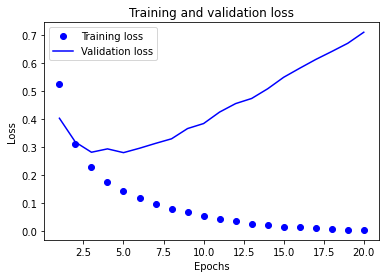

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

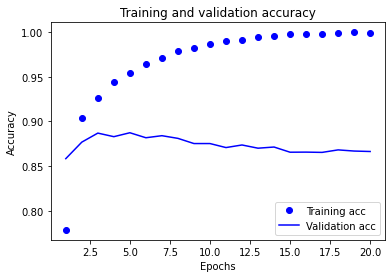

In [32]:
plt.clf()   # 그래프를 초기화
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

점선은 훈련 손실과 정확도이고 실선은 검증 손실과 정확도입니다. 신경망의 무작위한 초기화 때문에 사람마다 결과거 조금 다를 수 있습니다.

여기에서 볼 수 있듯이 훈련 손실이 에포크마다 감소하고 훈련 정확도는 에포크마다 증가합니다. 경사 하강법 최적화를 사용했을 때 반복마다 최소화되는 것이 손실이므로 기대했던 대로입니다. 검증 손실과 정확도는 이와 같지 않습니다. 4번째 에포크에서 그래프가 역전되는 것 같습니다. 이것이 훈련 세트에서 잘 작동하는 모델이 처음 보는 데이터에 잘 작동하지 않을 수 있다고 앞서 언급한 경고의 한 사례입니다. 정확한 용어로 말하면 과대적합되었다고 합니다. 2번째 에포크 이후부터 훈련 데이터에 과도하게 최적화되어 훈련 데이터에 특화된 표현을 학습하므로 훈련 세트 이외의 데이터에는 일반화되지 못합니다.

이런 경우에 과대적합을 방지하기 위해서 3번째 에포크 이후에 훈련을 중지할 수 있습니다. 

처음부터 다시 새로운 신경망을 4번의 에포크 동안만 훈련하고 테스트 데이터에서 평가해 보겠습니다:

In [33]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 20ms/step - loss: 0.5989 - accuracy: 0.6819
Epoch 2/4
49/49 [==============================] - 1s 19ms/step - loss: 0.3100 - accuracy: 0.9037
Epoch 3/4
49/49 [==============================] - 1s 19ms/step - loss: 0.2123 - accuracy: 0.9289
Epoch 4/4
782/782 [==============================] - 5s 5ms/step - loss: 0.2939 - accuracy: 0.8840


In [34]:
results

[0.29391640424728394, 0.8840000033378601]

아주 단순한 방식으로도 87%의 정확도를 달성
최고 수준의 기법을 사용하면 95%에 가까운 성능을 얻을 수 있음

## 훈련된 모델로 새로운 데이터에 대해 예측하기



In [35]:
model.predict(x_test)

array([[0.2381248 ],
       [0.99997234],
       [0.936939  ],
       ...,
       [0.14872678],
       [0.09813858],
       [0.64623666]], dtype=float32)